## This notebook is for pre-processing liveability factor data

### 1. Setting up the coding environment (Nene)

In [13]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler

In [14]:
# Function to save cleaned dataframe

def save_data(dataframe, dest: str, name: str):
    file = os.path.join(dest, name)  # dest/name

    # If the file is not existing...
    if not os.path.isfile(file):
        print(f"{file} not found, saving...")
        path = os.path.split(dest)  # dest1, dest2

        # Make sure the destination file exits
        if len(path) >= 1 and path[0] != "":
            os.makedirs(os.path.join(*path), exist_ok=True)

        # Save the file
        dataframe.to_csv(file, index=False)

        print("\tDone saving.")

    else:
        print(f"Found {file} locally, done!")

    return

### 2. Reading and cleaning data (Nene)

| Metric | Data | Unit | Year | Link |
| :- | -: | :- | :-: | :- |
| 1_Transportation | PTAL | Ward | 2013 | https://data.london.gov.uk/dataset/london-ward-well-being-scores |
| 2_Neighbourhood | Green and open space access | Ward | 2013 | (same as above) |
| 3_Opportunity | Average GCSE scores | Ward | 2013 | (same as above) |
| 4_Housing | Median rent price | Ward | 2014* | https://data.london.gov.uk/dataset/ward-profiles-and-atlas |
| 5_Environment | Pollution impact | Ward | 2008* | https://data.london.gov.uk/dataset/estimation-health-impacts-particulate-pollution-london |
| 6_Safety | Road Collisions | Ward | 2013 | https://data.london.gov.uk/dataset/road-collisions-severity |
| 7_Future prospect | Change in house price | Ward | (tbd)* | https://data.london.gov.uk/dataset/average-house-prices |

In [24]:
# Initialise the dataframe to store all data
df_combined = pd.DataFrame()

#### 1 & 2 & 3 - from well-being scores

In [34]:
# Reading in the data

file = os.path.join('data', 'raw', 'well_being_data.csv')
cols = ['Ward', 'New ward code', 'Public Transport Accessibility - 2013', 
        'Homes with access to open space & nature, and % greenspace - 2013',
        'GCSE point scores - 2013', ]

df_well_being = pd.read_csv(file, usecols = cols, encoding= 'unicode_escape')

In [37]:
# Renaming columns
df_well_being.rename(columns={"Ward": "ward_name", 
                           "New ward code": "ward_code",
                           "GCSE point scores - 2013": "gcse_2013",
                           "Public Transport Accessibility - 2013": "ptal_2013",
                           "Homes with access to open space & nature, and % greenspace - 2013": 'nature_access_2013'},
                  inplace=True)

df_well_being.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 711 entries, 0 to 710
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ward_code           659 non-null    object 
 1   ward_name           657 non-null    object 
 2   gcse_2013           660 non-null    float64
 3   ptal_2013           659 non-null    float64
 4   nature_access_2013  659 non-null    float64
dtypes: float64(3), object(2)
memory usage: 27.9+ KB


#### 4 - from ward atlas

In [36]:
# Reading in the data

file = os.path.join('data', 'raw', 'ward_atlas.csv')
cols = ['Ward name', 'New code', 'Median House Price (£) - 2014']

df_housing = pd.read_csv(file, usecols = cols, encoding= 'unicode_escape')

In [38]:
# Renaming columns
df_housing.rename(columns={"Ward name": "ward_name", 
                           "New code": "ward_code",
                           "Median House Price (£) - 2014": "median_house_2014"},
                  inplace=True)

df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ward_name          660 non-null    object 
 1   ward_code          660 non-null    object 
 2   median_house_2014  660 non-null    float64
dtypes: float64(1), object(2)
memory usage: 15.6+ KB


#### 5 - from pollution impact data

In [39]:
# Reading in the data

file = os.path.join('data', 'raw', 'air_pollution_mortality.csv')
cols = ['Area Code', 'Area Name', 'PM2.5 Concentration (µg/m3)']

df_pollution = pd.read_csv(file, usecols = cols, encoding= 'unicode_escape')

In [40]:
# Renaming columns
df_pollution.rename(columns={"Area Code": "ward_code", 
                           "Area Name": "ward_name",
                           "PM2.5 Concentration (µg/m3)": "PM2.5_conc_2008"},
                  inplace=True)

df_pollution.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ward_code        626 non-null    object 
 1   ward_name        626 non-null    object 
 2   PM2.5_conc_2008  626 non-null    float64
dtypes: float64(1), object(2)
memory usage: 14.8+ KB


#### 6 - from road collision severity data

In [28]:
# Reading in the data

file = os.path.join('data', 'raw', 'road_collision.csv')

df_collision = pd.read_csv(file, encoding= 'unicode_escape')
df_collision.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ï»¿          657 non-null    object
 1   Unnamed: 1   656 non-null    object
 2   Unnamed: 2   656 non-null    object
 3   2010         657 non-null    object
 4   Unnamed: 4   657 non-null    object
 5   Unnamed: 5   657 non-null    object
 6   Unnamed: 6   657 non-null    object
 7   2011         657 non-null    object
 8   Unnamed: 8   657 non-null    object
 9   Unnamed: 9   657 non-null    object
 10  Unnamed: 10  657 non-null    object
 11  2012         657 non-null    object
 12  Unnamed: 12  657 non-null    object
 13  Unnamed: 13  657 non-null    object
 14  Unnamed: 14  657 non-null    object
 15  2013         657 non-null    object
 16  Unnamed: 16  657 non-null    object
 17  Unnamed: 17  657 non-null    object
 18  Unnamed: 18  657 non-null    object
 19  2014         657 non-null    

In [ ]:
# Renaming columns
#(Take code from fsds on dimsneionality reduction -> pick out 2013 total or 2013 severe)

#### 7 - from average house price data (temporal trend)

In [ ]:
#tbd

#### Combine 5 dataframes into 1 based on ward name

In [ ]:
# merge 

# all_data = pd.merge(livability_no_housing, df_housing, left_on='new_ward_code', right_on='new_code', how='inner')

In [ ]:
'''
# save

dest = os.path.join("data", "clean")
name = "df_data_final.csv"

save_data(all_data, dest, name)
'''

### 3. Creating statistical summary of the original data (Richy)

In [19]:
# Find the skewness
df_housing.median_house.skew()

4.273072535393911

In [ ]:
# mean of each column
all_data['Unemployment_rate_2013'].mean()
all_data['Crime_rate_2013'].mean()
all_data['Life_Expectancy_2009-13'].mean()
all_data['GCSE_point_scores_2013'].mean()
all_data['Public_Transport_Accessibility_2013'].mean()
all_data['Homes_with access_to_open_space_nature'].mean()
all_data['median_house'].mean()

In [ ]:
# standard devation of each column
all_data['Unemployment_rate_2013'].std()
all_data['Crime_rate_2013'].std()
all_data['Life_Expectancy_2009-13'].std()
all_data['GCSE_point_scores_2013'].std()
all_data['Public_Transport_Accessibility_2013'].std()
all_data['Homes_with access_to_open_space_nature'].std()
all_data['median_house'].std()

In [ ]:
all_data[["Unemployment_rate_2013", "Crime_rate_2013", "Life_Expectancy_2009-13", "GCSE_point_scores_2013", "Public_Transport_Accessibility_2013", "Homes_with access_to_open_space_nature", "median_house"   ]].mean()

In [ ]:
# print the skew
print(all_data['Unemployment_rate_2013'].skew())
print(all_data['Crime_rate_2013'].skew())
print(all_data['Life_Expectancy_2009-13'].skew())
print(all_data['GCSE_point_scores_2013'.skew())
print(all_data['Public_Transport_Accessibility_2013'].skew())
print(all_data['Homes_with access_to_open_space_nature'].skew())
print(all_data['median_house'].skew())


In [ ]:
all_data[["Unemployment_rate_2013", "Crime_rate_2013", "Life_Expectancy_2009-13", "GCSE_point_scores_2013", "Public_Transport_Accessibility_2013", "Homes_with access_to_open_space_nature", "median_house"   ]].skew()

<AxesSubplot:ylabel='Frequency'>

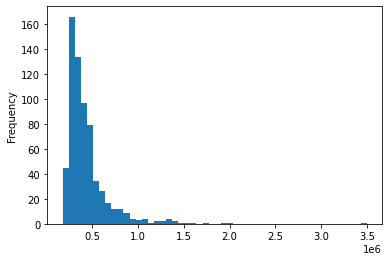

In [42]:
# Investigating the distribution
df_housing.median_house_2014.plot.hist(bins=50)

In [ ]:
all_data.Unemployment_rate_2013.plot.hist(bins=50)

In [ ]:
all_data.Crime_rate_2013.plot.hist(bins=50)

In [ ]:
all_data.Life_Expectancy_2009-13.plot.hist(bins=50)

In [ ]:
all_data.GCSE_point_scores_2013.plot.hist(bins=50)

In [ ]:
all_data.Public_Transport_Accessibility_2013.plot.hist(bins=50)

In [ ]:
all_data.CHomes_with access_to_open_space_nature.plot.hist(bins=50)

In [ ]:
all_data.median_house.plot.hist(bins=50)

### 4. Rescaling the data ready for clustering (Nene)

In [12]:
# Initialise the robus recaler
rbs = RobustScaler(quantile_range=[0.05,0.95])

In [ ]:
# Rescale
standardised_all_data = []

for c in all_data:
    standardised_all_data[c] = rbs.fit_transform(all_data[c].values.reshape(-1,1))
    
# Check
standardised_all_data(3)

### 5. Summarise statisticcal summary of the rescaled data (Richy)